In [1]:
################################################################################################################################
###     THIS WORKSHEET PERFORMS THE COMPUTATIONS WITH THE REGULAR 24-CELL AND ITS COLOUIRING MENTIONED IN THE MANUSCRIPT     ###
################################################################################################################################

In [2]:
#
# The list of 2-dimensional triangles of the 24-cell
#
triangles = [[0, 9, 10], [0, 9, 17], [0, 9, 19], [0, 10, 16], [0, 10, 18], [0, 13, 15], [0, 13, 17], [0, 13, 19], [0, 15, 16], [0, 15, 18], [0, 16, 17], [0, 18, 19], [1, 2, 5], [1, 2, 12], [1, 2, 19], [1, 5, 6], [1, 5, 13], [1, 6, 12], [1, 6, 17], [1, 9, 12], [1, 9, 17], [1, 9, 19], [1, 13, 17], [1, 13, 19], [2, 3, 14], [2, 3, 21], [2, 3, 23], [2, 5, 14], [2, 5, 23], [2, 12, 21], [2, 12, 23], [2, 14, 19], [2, 19, 21], [3, 4, 14], [3, 4, 22], [3, 4, 23], [3, 11, 21], [3, 11, 22], [3, 11, 23], [3, 14, 18], [3, 18, 21], [3, 18, 22], [4, 5, 14], [4, 5, 20], [4, 5, 23], [4, 8, 20], [4, 8, 22], [4, 8, 23], [4, 14, 15], [4, 15, 20], [4, 15, 22], [5, 6, 20], [5, 6, 23], [5, 13, 14], [5, 13, 20], [6, 7, 8], [6, 7, 12], [6, 7, 17], [6, 8, 20], [6, 8, 23], [6, 12, 23], [6, 17, 20], [7, 8, 11], [7, 8, 16], [7, 9, 10], [7, 9, 12], [7, 9, 17], [7, 10, 11], [7, 10, 16], [7, 11, 12], [7, 16, 17], [8, 11, 22], [8, 11, 23], [8, 16, 20], [8, 16, 22], [9, 10, 21], [9, 12, 21], [9, 19, 21], [10, 11, 21], [10, 11, 22], [10, 16, 22], [10, 18, 21], [10, 18, 22], [11, 12, 21], [11, 12, 23], [13, 14, 15], [13, 14, 19], [13, 15, 20], [13, 17, 20], [14, 15, 18], [14, 18, 19], [15, 16, 20], [15, 16, 22], [15, 18, 22], [16, 17, 20], [18, 19, 21]]

In [3]:
#
# The 2-dim skeleton of the 24-cell giving rise to a combinatorial complex
#
Z = SimplicialComplex(triangles);

In [4]:
#
# The list of octahedra of the 24-cell
#
octahedra = [[0, 9, 19, 21, 18, 10], [0, 9, 19, 1, 13, 17], [0, 19, 18, 14, 13, 15], [9, 19, 21, 1, 2, 12], [19, 21, 18, 14, 2, 3], [19, 1, 14, 2, 13, 5], [0, 9, 10, 17, 16, 7], [0, 18, 10, 15, 16, 22], [9, 21, 10, 12, 7, 11], [21, 18, 10, 3, 22, 11], [10, 16, 7, 22, 11, 8], [0, 13, 17, 15, 16, 20], [9, 1, 17, 12, 7, 6], [17, 16, 7, 8, 20, 6], [1, 13, 17, 5, 20, 6], [15, 16, 22, 8, 20, 4], [14, 13, 15, 5, 20, 4], [18, 14, 15, 3, 22, 4], [14, 2, 3, 5, 4, 23], [21, 2, 12, 3, 11, 23], [3, 22, 11, 8, 4, 23], [5, 8, 20, 6, 4, 23], [1, 2, 12, 5, 6, 23], [12, 7, 11, 8, 6, 23]]

In [5]:
#
# The list of colours used
#
Colours = [(1, 0, 0, 0), (0, 1, 0, 0), (0, 0, 1, 0), (0, 0, 0, 1), (0, 1, 1, 1), (1, 0, 1, 1), (1, 1, 0, 1), (1, 1, 1, 0)]
Colours = [vector(GF(2), v) for v in Colours]

In [6]:
#
# The colouring of the 24-cell (indices of colours)
#
c = [0, 7, 0, 6, 7, 1, 5, 6, 0, 1, 7, 4, 3, 6, 4, 5, 2, 4, 3, 2, 3, 5, 1, 2]

In [7]:
#
# The standard basis in the set of colours
#
matrix(GF(2), [Colours[c[0]], Colours[c[5]], Colours[c[23]], Colours[c[12]]])

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]

In [8]:
#
# The matrix representative of a permutation of colours
#
def matrix_rep(g):
    return matrix(GF(2), [Colours[c[g(0)]], Colours[c[g(5)]], Colours[c[g(23)]], Colours[c[g(12)]]]).transpose()

In [9]:
#
# Computing the group of admissible symmetries of the colouring and its image in GL(4,2)
#
perm_list = []
matrix_list = []
for g in Z.automorphism_group():
    L = matrix_rep(g)
    if all([Colours[c[g(v)]]==L*Colours[c[v]] for v in Z.vertices()]):
        perm_list += [g]
        matrix_list += [L]
G = PermutationGroup(perm_list)
H = MatrixGroup(matrix_list)
print(G.structure_description()) # requires GAP
print(H.structure_description()) # requires GAP

C3 x SL(2,3)
SL(2,3)


In [10]:
#
# Recall that SL(2,3) is isomorphic to the binary tetrahedral group: https://en.wikipedia.org/wiki/Binary_tetrahedral_group
#

In [11]:
#
# Defining the adjacency relation for the ``matrix'' 24-cell with vertices in H
#
def adjacent(u,v):
    return (u*v^-1).order()==6

In [12]:
#
# Finding triangles in H
#
H_list = H.list()
H_triangles = []
for u in H_list:
    for v in H_list:
        for w in H_list:
            if adjacent(u, v) and adjacent(v, w) and adjacent(w, u):
                H_triangles += [tuple(sorted([H_list.index(u), H_list.index(v), H_list.index(w)]))]

In [13]:
#
# The combinatorial complex with the 2-skeleton made of the above triangles
#
H24 = SimplicialComplex(H_triangles)

In [14]:
#
# Finding an isomorphism between Z and H
#
_, i1 = Z.is_isomorphic(H24, certificate=True)
print(i1)

{10: 18, 17: 20, 19: 16, 16: 0, 1: 14, 2: 1, 5: 19, 12: 23, 6: 2, 3: 21, 14: 10, 21: 12, 23: 8, 4: 4, 22: 15, 11: 6, 20: 13, 8: 17, 7: 11, 0: 9, 9: 5, 13: 7, 15: 22, 18: 3}


In [15]:
#
# Looking for a permutation to adjust the above isomorphism so that
# the colour of each vertex in Z = the 1st column of the respective
# matrix in H
#
adjust = []
e1 = vector(GF(2), [1,0,0,0])
for g in H24.automorphism_group():
    if all([Colours[c[k]] == H_list[g(i1[k])]*e1 for k in i1.keys()]):
        print(g)
        adjust += [g]

(0,9)(1,8)(2,10)(3,11)(4,14)(5,15)(6,12)(7,13)(16,17)(20,22)(21,23)


(0,1)(2,6)(3,7)(8,17)(9,16)(10,22)(11,23)(12,20)(13,21)(14,18)(15,19)


(0,17)(1,16)(2,20)(3,21)(4,18)(5,19)(6,22)(7,23)(8,9)(10,12)(11,13)


In [16]:
#
# Adjusting i1 with an appropriate element above (any should do the job)
#
i2 = {}
g  = adjust[2]
for k in i1.keys():
    i2[k] = g(i1[k])
print(i2)

{10: 4, 17: 2, 19: 1, 16: 17, 1: 14, 2: 16, 5: 5, 12: 7, 6: 20, 3: 3, 14: 12, 21: 10, 23: 9, 4: 18, 22: 15, 11: 22, 20: 11, 8: 0, 7: 13, 0: 8, 9: 19, 13: 23, 15: 6, 18: 21}


In [17]:
#
# (Double-)Checking that the colour of a vertex P \in H is the 1st column of P
#
all([Colours[c[k]] == H_list[i2[k]]*e1 for k in i2.keys()])

True

In [18]:
#
# The list of octahedra in H = the 24-cell
#
H_octahedra = [list(map(lambda v: i2[v], o)) for o in octahedra]
print(H_octahedra)

[[8, 19, 1, 10, 21, 4], [8, 19, 1, 14, 23, 2], [8, 1, 21, 12, 23, 6], [19, 1, 10, 14, 16, 7], [1, 10, 21, 12, 16, 3], [1, 14, 12, 16, 23, 5], [8, 19, 4, 2, 17, 13], [8, 21, 4, 6, 17, 15], [19, 10, 4, 7, 13, 22], [10, 21, 4, 3, 15, 22], [4, 17, 13, 15, 22, 0], [8, 23, 2, 6, 17, 11], [19, 14, 2, 7, 13, 20], [2, 17, 13, 0, 11, 20], [14, 23, 2, 5, 11, 20], [6, 17, 15, 0, 11, 18], [12, 23, 6, 5, 11, 18], [21, 12, 6, 3, 15, 18], [12, 16, 3, 5, 18, 9], [10, 16, 7, 3, 22, 9], [3, 15, 22, 0, 18, 9], [5, 0, 11, 20, 18, 9], [14, 16, 7, 5, 20, 9], [7, 13, 22, 0, 20, 9]]


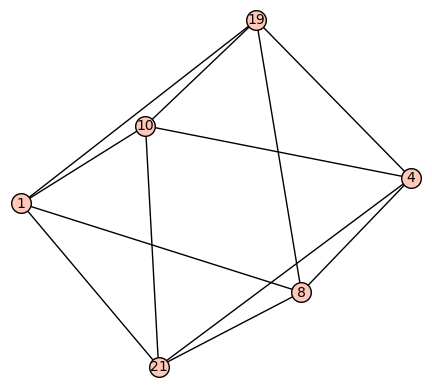

In [19]:
#
# Choosing an octahedron in H = the 24-cell
#
octa = Graph();
for i in H_octahedra[0]:
    for j in H_octahedra[0]:
        if adjacent(H_list[i], H_list[j]):
            octa.add_edge(i, j)
octa.plot().show()

In [20]:
#
# Showing the matrices corresponding to its opposite vertices
#
print('---------')
print('---------')
print(H_list[0])
print('---------')
print(H_list[4])
print('---------')
print('---------')
print(H_list[13])
print('---------')
print(H_list[15])
print('---------')
print('---------')
print(H_list[17])
print('---------')
print(H_list[22])
print('---------')
print('---------')

---------
---------
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
---------
[1 1 0 1]
[1 0 1 1]
[1 0 0 0]
[0 0 0 1]
---------
---------
[1 0 0 1]
[1 0 1 0]
[0 1 1 1]
[1 0 1 1]
---------
[0 0 1 0]
[1 0 1 0]
[0 0 1 1]
[0 1 0 0]
---------
---------
[0 1 1 0]
[0 0 0 1]
[1 1 0 1]
[0 1 0 1]
---------
[0 1 1 1]
[1 1 1 0]
[1 1 0 0]
[1 0 1 0]
---------
---------


In [21]:
#
# The colouring is proper on a particular octahedron
#
# Since H acts transitively on the 24-cell, then the
# colouring is proper on each of its octahedral facets
#
flag = []
e1 = vector(GF(2),[1,0,0,0])
for p in octa:
    for q in octa:
        for r in octa:
            u = H_list[p]
            v = H_list[q]
            w = H_list[r]
            if adjacent(u,v) and adjacent(v,w) and adjacent(w,u):
                U = matrix(GF(2), u)
                V = matrix(GF(2), v)
                W = matrix(GF(2), w)
                flag += [matrix(GF(2),[U*e1,V*e1,W*e1]).rank()==3]
print(all(flag))

True


In [22]:
#
# The colouring produces a Hantzsche--Wendt manifold:
# its defining matrix is \Lambda and its T-set is given by
# T = {e_12 = e_1 + e_2, e_34 = e_3 + e_4, e_56 = e_5 + e_6}
#
Lambda = [[1, 1, 0, 0, 0, 1],
          [0, 0, 1, 0, 0, 1],
          [0, 1, 0, 0, 1, 1],
          [0, 1, 0, 1, 0, 0]]
Lambda = matrix(GF(2), Lambda)
e12 = vector(GF(2),[1,1,0,0,0,0])
e34 = vector(GF(2),[0,0,1,1,0,0])
e56 = vector(GF(2),[0,0,0,0,1,1])

In [23]:
#
# Applying Proposition 3.1 from [Ferrari, Kolpakov, Slavich]
#
e12 in Lambda.row_space().list(), e34 in Lambda.row_space().list(), e56 in Lambda.row_space().list()
#
# (False, False, False) means that the T-set does not intersect the row space of \Lambda
#

(False, False, False)

In [24]:
#
# The action of H on the left does not preserve the colouring (as expected), and has a trivial stabiliser
#
sym = []
for s in H_list:
    if all([matrix(s*h)*e1==matrix(h)*e1 for h in H_list]):
        sym += [s]
for s in sym:
    print('---------')
    print(s)
    print('---------')

---------
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
---------


In [25]:
# The action of H on the right has a cyclic order 3 subgroup that preserves the facet colours
sym = []
for s in H_list:
    if all([matrix(h*s)*e1==matrix(h)*e1 for h in H_list]):
        sym += [s]
for s in sym:
    print('---------')
    print(s)
    print('---------')

---------
[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
---------
---------
[1 1 0 0]
[0 1 0 1]
[0 0 1 0]
[0 1 0 0]
---------
---------
[1 0 0 1]
[0 0 0 1]
[0 0 1 0]
[0 1 0 1]
---------


In [26]:
#
# Below we provide a further computation that finds an explicit injective homomorphism from
# the binary tetrahedral group described via Hurwitz quaternions onto H as a subgroup of GL(4,2)
#

In [27]:
#
# Defining the quaternion algebra for the binary tetrahedral group
#
z = QQ['z'].0
F = NumberField(z^2 - z - 1,'s'); F
Q.<I,J,K>=QuaternionAlgebra(F(-1),F(-1))
s = F.0; s
Q.inject_variables()

Defining I, J, K


In [28]:
#
# The set of elements of the binary tetrahedral group
#
BinTset=[1,
 -K,
 -1/2 + 1/2*I + (-1/2)*J + (-1/2)*K,
 -1/2 + 1/2*I + (-1/2)*J + 1/2*K,
 -1/2 + 1/2*I + 1/2*J + 1/2*K,
 -1/2 + 1/2*I + 1/2*J + (-1/2)*K,
 -1/2 + (-1/2)*I + 1/2*J + (-1/2)*K,
 -I,
 -1/2 + (-1/2)*I + 1/2*J + 1/2*K,
 1/2 + (-1/2)*I + (-1/2)*J + (-1/2)*K,
 1/2 + (-1/2)*I + (-1/2)*J + 1/2*K,
 -1/2 + (-1/2)*I + (-1/2)*J + 1/2*K,
 -1/2 + (-1/2)*I + (-1/2)*J + (-1/2)*K,
 1/2 + 1/2*I + 1/2*J + (-1/2)*K,
 I,
 1/2 + 1/2*I + 1/2*J + 1/2*K,
 1/2 + (-1/2)*I + 1/2*J + 1/2*K,
 1/2 + (-1/2)*I + 1/2*J + (-1/2)*K,
 1/2 + 1/2*I + (-1/2)*J + 1/2*K,
 1/2 + 1/2*I + (-1/2)*J + (-1/2)*K,
 J,
 -J,
 K,
 -1]
#
# Creating the group as a list of quaternions
#
BinT = [Q(q) for q in BinTset]

In [29]:
#
# The binary tetrahedral group has presentation < s,t | (s*t)^2=t^3=s^3 >,
# where we can put s=1/2*(1+i+j+k), t=1/2*(1+i+j-k)
#
S = 1/2*(1+I+J+K)
T = 1/2*(1+I+J-K)
print((S*T), ',', (S*T)^2)
print(S, ',', S^2, ',', S^3)
print(T, ',', T^2, ',', T^3)

J , -1
1/2 + 1/2*I + 1/2*J + 1/2*K , -1/2 + 1/2*I + 1/2*J + 1/2*K , -1
1/2 + 1/2*I + 1/2*J + (-1/2)*K , -1/2 + 1/2*I + 1/2*J + (-1/2)*K , -1


In [30]:
#
# Printing out all possible images in H of the generators s and t, as above
#
for s in H_list:
    for t in H_list:
        if ((s*t)^2==s^3==t^3) and (H.subgroup([s,t]).order()==24):
            print('---------')
            print('s = ')
            print(s)
            print('t = ')
            print(t)
            print('---------')

---------
s = 
[0 0 1 1]
[0 1 0 1]
[1 1 0 1]
[0 1 0 0]
t = 
[1 1 0 1]
[1 1 1 0]
[1 0 0 1]
[0 1 0 1]
---------
---------
s = 
[0 0 1 1]
[0 1 0 1]
[1 1 0 1]
[0 1 0 0]
t = 
[1 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 1 0]
---------
---------
s = 
[0 0 1 1]
[0 1 0 1]
[1 1 0 1]
[0 1 0 0]
t = 
[0 1 1 1]
[1 1 1 0]
[1 1 0 0]
[1 0 1 0]
---------
---------
s = 
[0 1 1 1]
[0 1 0 1]
[0 1 1 0]
[1 0 1 1]
t = 
[0 1 1 0]
[0 0 0 1]
[1 1 0 1]
[0 1 0 1]
---------
---------
s = 
[0 1 1 1]
[0 1 0 1]
[0 1 1 0]
[1 0 1 1]
t = 
[1 1 0 1]
[1 1 1 0]
[1 0 0 1]
[0 1 0 1]
---------
---------


s = 
[0 1 1 1]
[0 1 0 1]
[0 1 1 0]
[1 0 1 1]
t = 
[1 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 1 0]
---------
---------
s = 
[1 0 0 1]
[1 0 1 0]
[0 1 1 1]
[1 0 1 1]
t = 
[0 1 1 0]
[0 0 0 1]
[1 1 0 1]
[0 1 0 1]
---------


---------
s = 
[1 0 0 1]
[1 0 1 0]
[0 1 1 1]
[1 0 1 1]
t = 
[1 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 1 0]
---------
---------
s = 
[1 0 0 1]
[1 0 1 0]
[0 1 1 1]
[1 0 1 1]
t = 
[0 1 1 1]
[1 1 1 0]
[1 1 0 0]
[1 0 1 0]
---------


---------
s = 
[0 0 1 0]
[1 0 1 0]
[0 0 1 1]
[0 1 0 0]
t = 
[0 1 1 0]
[0 0 0 1]
[1 1 0 1]
[0 1 0 1]
---------
---------
s = 
[0 0 1 0]
[1 0 1 0]
[0 0 1 1]
[0 1 0 0]
t = 
[1 1 0 1]
[1 1 1 0]
[1 0 0 1]
[0 1 0 1]
---------
---------
s = 
[0 0 1 0]
[1 0 1 0]
[0 0 1 1]
[0 1 0 0]
t = 
[0 1 1 1]
[1 1 1 0]
[1 1 0 0]
[1 0 1 0]
---------
---------
s = 
[0 1 1 0]
[0 0 0 1]
[1 1 0 1]
[0 1 0 1]
t = 
[0 1 1 1]
[0 1 0 1]
[0 1 1 0]
[1 0 1 1]
---------
---------
s = 
[0 1 1 0]
[0 0 0 1]
[1 1 0 1]
[0 1 0 1]
t = 
[1 0 0 1]
[1 0 1 0]
[0 1 1 1]
[1 0 1 1]
---------
---------
s = 
[0 1 1 0]
[0 0 0 1]
[1 1 0 1]
[0 1 0 1]
t = 
[0 0 1 0]
[1 0 1 0]
[0 0 1 1]
[0 1 0 0]
---------


---------
s = 
[1 1 0 1]
[1 1 1 0]
[1 0 0 1]
[0 1 0 1]
t = 
[0 0 1 1]
[0 1 0 1]
[1 1 0 1]
[0 1 0 0]
---------
---------
s = 
[1 1 0 1]
[1 1 1 0]
[1 0 0 1]
[0 1 0 1]
t = 
[0 1 1 1]
[0 1 0 1]
[0 1 1 0]
[1 0 1 1]
---------
---------
s = 
[1 1 0 1]
[1 1 1 0]
[1 0 0 1]
[0 1 0 1]
t = 
[0 0 1 0]
[1 0 1 0]
[0 0 1 1]
[0 1 0 0]
---------


---------
s = 
[1 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 1 0]
t = 
[0 0 1 1]
[0 1 0 1]
[1 1 0 1]
[0 1 0 0]
---------
---------
s = 
[1 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 1 0]
t = 
[0 1 1 1]
[0 1 0 1]
[0 1 1 0]
[1 0 1 1]
---------
---------
s = 
[1 1 0 0]
[0 0 0 1]
[1 0 0 0]
[1 0 1 0]
t = 
[1 0 0 1]
[1 0 1 0]
[0 1 1 1]
[1 0 1 1]
---------


---------
s = 
[0 1 1 1]
[1 1 1 0]
[1 1 0 0]
[1 0 1 0]
t = 
[0 0 1 1]
[0 1 0 1]
[1 1 0 1]
[0 1 0 0]
---------
---------
s = 
[0 1 1 1]
[1 1 1 0]
[1 1 0 0]
[1 0 1 0]
t = 
[1 0 0 1]
[1 0 1 0]
[0 1 1 1]
[1 0 1 1]
---------
---------
s = 
[0 1 1 1]
[1 1 1 0]
[1 1 0 0]
[1 0 1 0]
t = 
[0 0 1 0]
[1 0 1 0]
[0 0 1 1]
[0 1 0 0]
---------
